In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [8]:
df = pd.read_csv("C:/Users/문도/Desktop/인지개 자료/boston.csv", index_col = 0)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


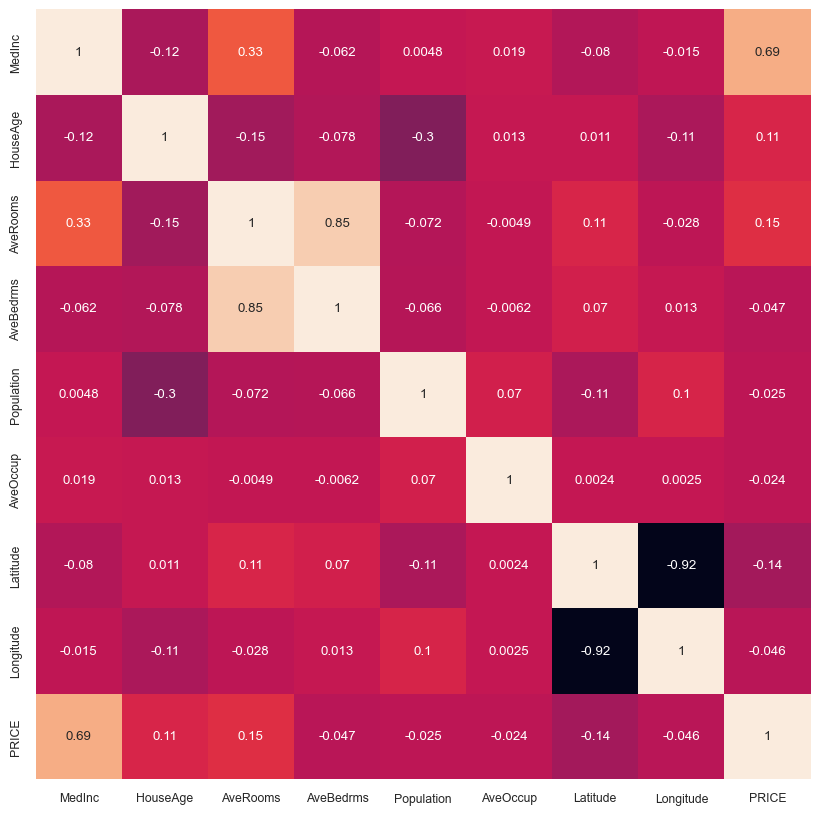

In [9]:
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [10]:
X = df.drop('PRICE', axis=1)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [11]:
y = df['PRICE']
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: PRICE, Length: 20640, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, shuffle=True)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16512, 8) (16512,)
(4128, 8) (4128,)


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
ly_pred = model.predict(X_test)

print('LR_평균제곱근오차', mean_squared_error(ly_pred, y_test))

LR_평균제곱근오차 0.5269927956248031


# **blue : test_value**
# **red : predict_value**

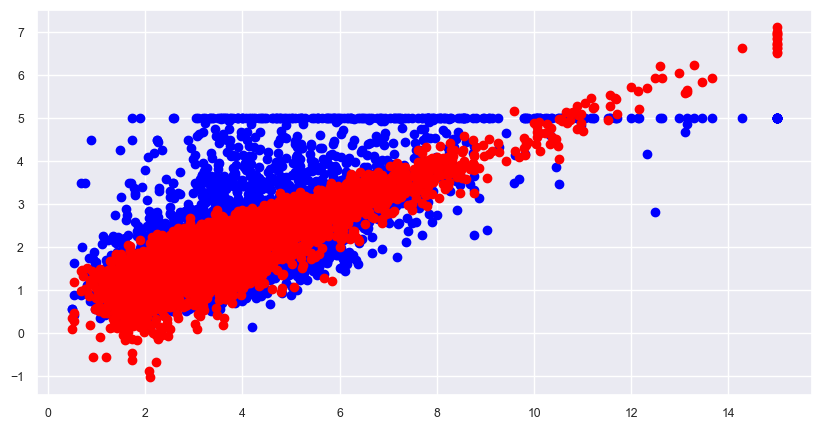

In [21]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test['MedInc'], y_test, c = 'blue', label='y_test')
plt.scatter(X_test['MedInc'], ly_pred, c = 'red', label='ly_pred')
plt.show()

In [22]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

dy_pred = model.predict(X_test)

print('DT_평균제곱근오차', mean_squared_error(dy_pred, y_test))

DT_평균제곱근오차 0.4734021180568798


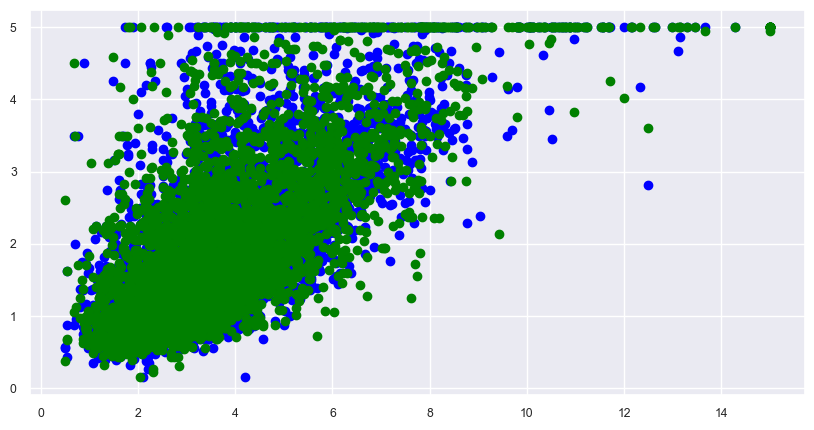

In [24]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test['MedInc'], y_test, c = 'blue', label='y_test')
plt.scatter(X_test['MedInc'], dy_pred, c = 'green', label='dy_pred')
plt.show()

In [25]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

ry_pred = model.predict(X_test)

print('RF_평균제곱근오차', mean_squared_error(ry_pred, y_test))

RF_평균제곱근오차 0.25033758014960644


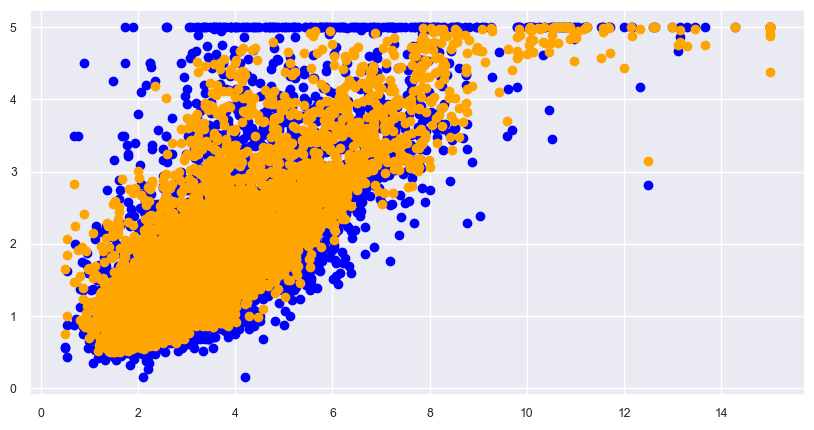

In [28]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test['MedInc'], y_test, c = 'blue', label='y_test')
plt.scatter(X_test['MedInc'], ry_pred, c = 'orange', label='ry_pred')
plt.show()

In [ ]:
model = SVR(kernel = 'linear')
model.fit(X_train, y_train)

sy_pred = model.predict(X_test)
print('SVR_평균제곱근오차', mean_squared_error(sy_pred, y_test))

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test['MedInc'], y_test, c = 'blue', label='y_test')
plt.scatter(X_test['MedInc'], sy_pred, c = 'yellow', label='sy_pred')
plt.show()